<a href="https://colab.research.google.com/github/BP-Test/sample/blob/master/subsampling_ripser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Aim of This Notebook
This is a notebook to test our sampling method.

In this notebook I will first define how sub-sampling method works. Which is selecting $ p (n \geqq p) $ words from word embedding in 2-ways.

Our sub-sampling method will reduce the number of words in the word embedding by matrix transformation explained below.


## How it works
#### Mean Version
1. Let $X$ be the n×m matrix which is "original word embedding", $\bar X$ be the "mean matrix" of X where
$\bar X_{ij} = \frac{1}{n}\sum_{k=1}^{n} X_{kj}$
2. Define matrix $B$ as $B = X-\bar X$
3. Define matrix $C$ which has  $C_{i }= \sum_{l=1}^{m}(B_{lj})^2$ as its element
4. Concatenate X with C on the horizontal way.
5. Resort the data in descending order of C
6. Transform the dataset by choosing the top $p$ $(n \geqq p) $ words

#### Median *Version*
1. Let $X$ be the n×m matrix which is "original word embedding", $\hat X$ be the "median matrix" of X where
\begin{align*}\hat X_{ij}  = \begin{cases} x_{\left(\frac{n+1}{2}, j\right)} & (n\,\text{ is odd number}) & \\[5pt] \frac{x_{\left(\frac{n}{2}, j\right)}+x_{\left(\frac{n}{2}+1, j\right)}}{2} & (n\,\text{is a even number}) & \\[5pt] \end{cases} \end{align*}
2. Define matrix $B$ as $B = X-\hat X$
3. Define matrix $C$ which has  $C_{i }= \sum_{l=1}^{m}(B_{ij})^2$ as its element
4. Concatenate X with C on the horizontal way.
5. Resort the data in descending order
6. Transform the dataset by choosing the top $p$ $(n \geqq p) $ words


## Table of Contents
### 0. Environment set up.
### 1. Ripser sample data {loop, sphere, torus, 8figure}
### 2. Add noise (random)
### 3. Sampling method. (mean and median)
### 4. Resort data
### 5. Apply persistent homology
### 6. Check if it can detect the whole
### 7. Conclusion
#### annotation
This book was done under googlebcollaboratory environment


##0. Environment set up.

In [0]:
!pip install ripser

     |████████████████████████████████| 81kB 2.2MB/s 
  Created wheel for ripser: filename=ripser-0.4.1-cp36-cp36m-linux_x86_64.whl size=423261 sha256=441d644b3afdc28698f5b1d7e1e5d9e77bcce5b0e69354435979a4807bedaac0
  Stored in directory: /root/.cache/pip/wheels/d4/12/da/56d55c3af62ebd5e0684d521f3e58c1a85ac312502c9e2d47d
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18091 sha256=0ba2f3e08139e5596057da3ee97735784e9a79ca252f8a7687fa1013a83f029b
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built ripser hopcroftkarp


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install tadasets

In [0]:
#importing related packages
import pandas as pd
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import csv
from ripser import Rips
import os
import tadasets # sample dataset from ripser such as torus sphere, etc
import matplotlib.pyplot as plt

In [0]:
cd drive/My\ Drive/

/content/drive/My Drive


## 1. Ripser Sample Data
### Loop

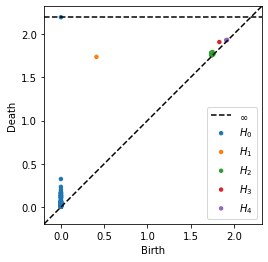

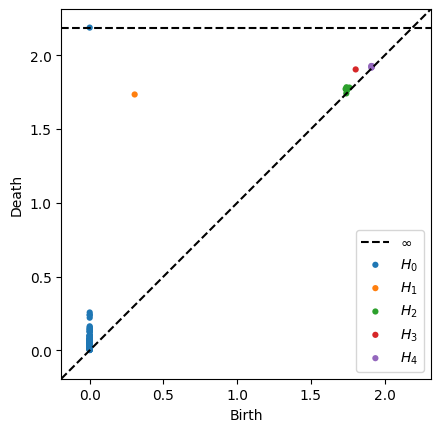

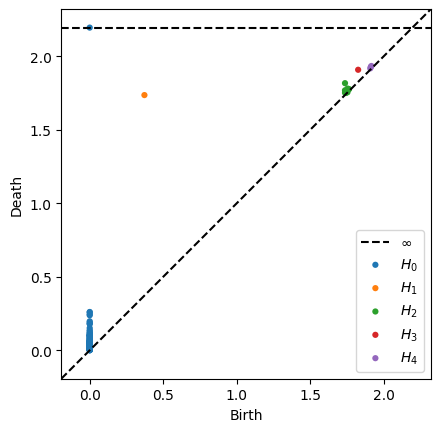

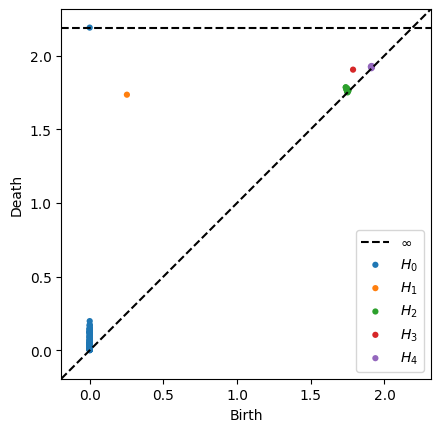

1 loop, best of 3: 1min 30s per loop


In [0]:
%%timeit
#loop
loop = tadasets.dsphere (d = 1) # circle
dgms = ripser(loop, maxdim = 4)["dgms"]
plot_diagrams(dgms, show = True)

→The orange dot on the left top is a 1-dimentional hole in the dataset.
This is right because a loop has 1 dimentional hole.


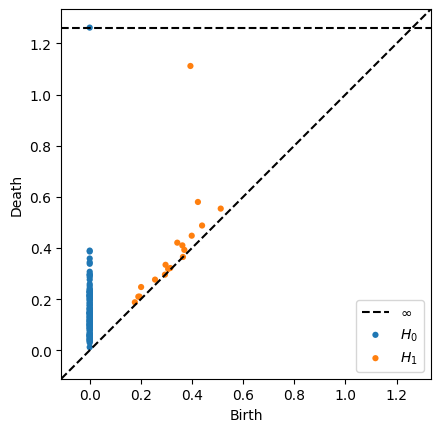

In [0]:
#loop
loop = tadasets.dsphere (d = 1,noise=0.2) # circle
dgms = ripser(loop, maxdim = 1)["dgms"]
plot_diagrams(dgms, show = True)

In [0]:
loop = tadasets.dsphere(d = 1)
loop.shape
sphere = tadasets.dsphere(d = 2)
sphere.shape


(100, 3)

### Sphere

In [0]:
# sphere is a data of (100, 3)
sphere = tadasets.dsphere (d = 2)
sphere.shape

(100, 3)

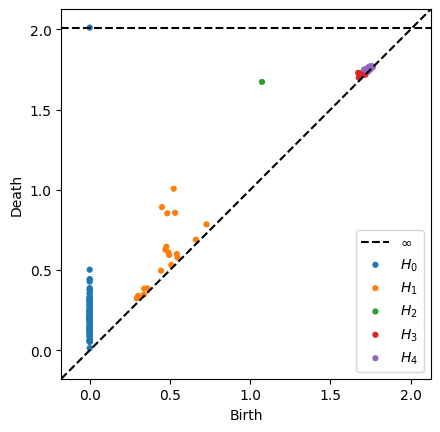

In [0]:
sphere = tadasets.dsphere (d = 2) # dsphere
dgms = ripser(sphere, maxdim = 4)["dgms"]
plot_diagrams(dgms, show = True)

*This persistent diagram shows that there is a 2-dimentional whole in a sphere→True.*

 

### Torus

In [0]:
##Torus in tadasets: (100, 3)
torus = tadasets.torus()
print(torus.shape)

(100, 3)


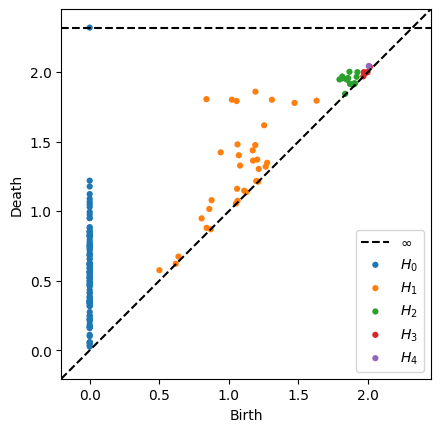

In [0]:
torus = tadasets.torus()
dgms = ripser(torus, maxdim = 4)["dgms"]
plot_diagrams(dgms, show = True)

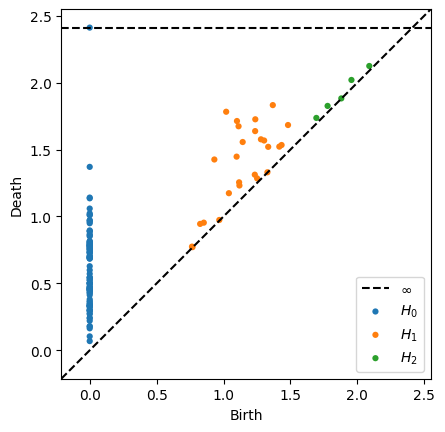

In [0]:
torus = tadasets.torus(noise = 0.2)
dgms = ripser(torus, maxdim = 2)["dgms"]
plot_diagrams(dgms, show = True)

I am not sure what to say about this. Torus should have 1 1-d hole and 1 2-d hole.

## 2. Adding Noise

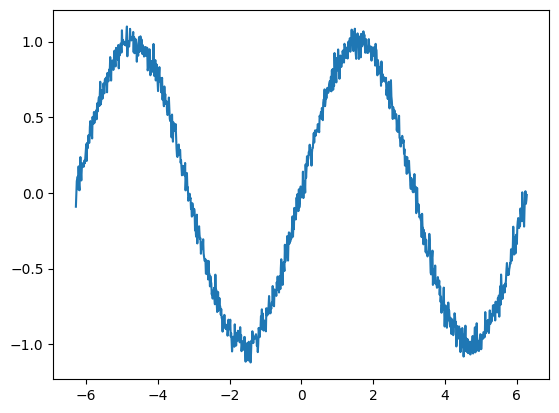

In [0]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 1000)[:, None]
#print(inputs)
outputs = np.sin(inputs) + 0.05*np.random.normal(size=[len(inputs), 1]) # sin curve

plt.plot(inputs, outputs)
#sincurve = pd.DataFrame(inputs, outputs)
#sincurve
sincurve = np.concatenate((inputs, outputs), axis = 1)
sincurve = pd.DataFrame(sincurve)


In [0]:
##Mean Method
x = np.mean(sincurve, axis=0)
x = pd.DataFrame(x)
#diff, square
diff = sincurve - x
#square diff of each word
squ = np.square(diff)
#sum of squared values of each word
squ_sum = np.sum(squ,axis=1)
# get order about sum
sort_value = np.argsort(squ_sum,axis=0)
# merge sort_value with vectors
sincurve['sort_value'] = sort_value
# sort by sort_value
re_ordered = sincurve.sort_values(by='sort_value',ascending=False)
re_ordered = re_ordered.drop('sort_value',axis=1)
sub_sampled2 = re_ordered.head(60)
dgms = ripser(sub_sampled2, maxdim=2)["dgms"]
plot_diagrams(dgms, show = True)

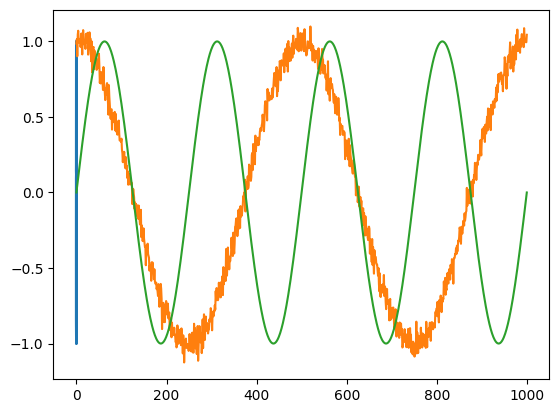

In [0]:
t = np.linspace(-2*np.pi, 2*np.pi, 1000)[:, None]
x = np.sin(t + 0.5*np.pi) + 0.05*np.random.normal(size=[len(inputs), 1]) # 8-figure
y = np.sin(2*t)
plt.plot(x, y)
figure_8 = np.concatenate((x,y), axis = 1)
figure_8 = pd.DataFrame(figure_8)
figure_8

plt.plot(figure_8)
#dgms = ripser(figure_8)["dgms"]
#plot_diagrams(dgms, show = True)

# 3.Sampling Method (mean)

### Mean Version

#### Loop with noise→Sub-Sample

In [0]:
##Mean Method
data = tadasets.dsphere (d = 1)
data = pd.DataFrame(data)
x = np.mean(data, axis=0)
x = pd.DataFrame(x)
#diff, square
diff = data - x
#square diff of each word
squ = np.square(diff)
#sum of squared values of each word
squ_sum = np.sum(squ,axis=1)
# get order about sum
sort_value = np.argsort(squ_sum,axis=0)
# merge sort_value with vectors
data['sort_value'] = sort_value
# sort by sort_value
re_ordered = data.sort_values(by='sort_value',ascending=False)
re_ordered = re_ordered.drop('sort_value',axis=1)

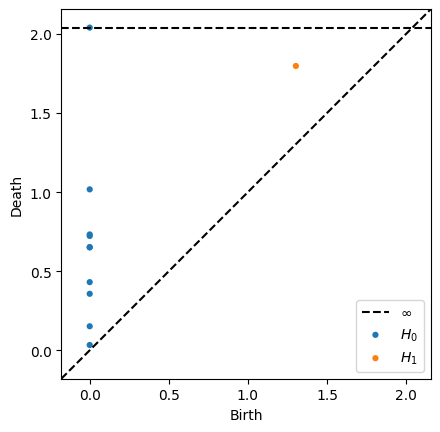

In [0]:
sub_sampled2 = re_ordered.head(10)
dgms = ripser(sub_sampled2)["dgms"]
plot_diagrams(dgms, show = True)


#### Sphere with noise → Sub-Sampled

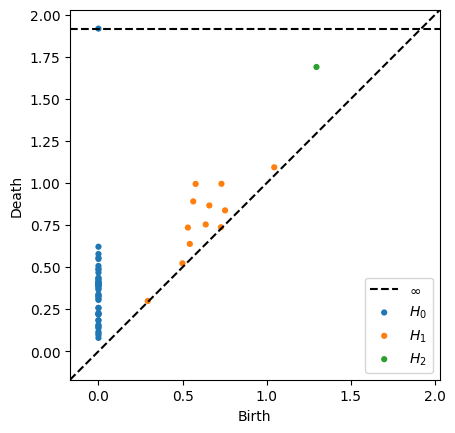

In [0]:
##Mean Method
data = tadasets.dsphere (d = 2)
data = pd.DataFrame(data)
x = np.mean(data, axis=0)
x = pd.DataFrame(x)
#diff, square
diff = data - x
#square diff of each word
squ = np.square(diff)
#sum of squared values of each word
squ_sum = np.sum(squ,axis=1)
# get order about sum
sort_value = np.argsort(squ_sum,axis=0)
# merge sort_value with vectors
data['sort_value'] = sort_value
# sort by sort_value
re_ordered = data.sort_values(by='sort_value',ascending=False)
re_ordered = re_ordered.drop('sort_value',axis=1)
sub_sampled2 = re_ordered.head(47)
dgms = ripser(sub_sampled2, maxdim=2)["dgms"]
plot_diagrams(dgms, show = True)


##### This implies that there is a 2-d hole

###Median Version

#### Loop with noise →Sub-Sampled

In [0]:
##Mean Method
data = tadasets.dsphere (d = 1)
data = pd.DataFrame(data)
x = np.mean(data, axis=0)
x = pd.DataFrame(x)
#diff, square
diff = data - x
#square diff of each word
squ = np.square(diff)
#sum of squared values of each word
squ_sum = np.sum(squ,axis=1)
# get order about sum
sort_value = np.argsort(squ_sum,axis=0)
# merge sort_value with vectors
data['sort_value'] = sort_value
# sort by sort_value
re_ordered = data.sort_values(by='sort_value',ascending=False)
re_ordered = re_ordered.drop('sort_value',axis=1)
# save as csv file

In [0]:
# Making random 15-d array that follows to normal distribution
x =np.random.normal(0,10, (100,15)

array([[ -6.51061634,  11.30373923,   4.96490929, ...,   0.69742349,
          8.2195129 , -21.43375075],
       [  7.24994315,   5.77424074,  -2.97007385, ...,  -0.60451966,
         -1.56989619,   3.75532165],
       [ -4.40476681,  14.3077384 ,  -8.76558367, ...,  10.57056248,
         -5.31636817,  -5.90595024],
       ...,
       [  4.33715763,   9.64322413,  -8.42846875, ...,   3.0708303 ,
          9.39023087, -11.36841369],
       [  0.61491191,   6.71024953,   9.28387741, ...,  -6.39883885,
          3.16378074,   0.30835211],
       [-11.01472502,  -4.259508  , -13.31657101, ...,  -2.15683791,
          6.29538063,  -0.6991907 ]])

In [0]:
t = np.linspace(-2*np.pi, 2*np.pi, 1000, (100, 3))[:, None]
x = np.sin(t + 0.5*np.pi) + 0.05*np.random.normal(size=[len(inputs), 1]) #
y = np.sin(2*t)


Ripser sample data {loop, sphere, torus, 8figure}
Add noise (random)
Sampling method. (mean and median)
## 4.Resort data


## 5.Apply persistent homology

## 6.Check if it can detect the whole

## 7.Conclusion

High likely that this method works, however, by reducing too much words, it will not be able to detect the hole of original manifold.

In [1]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1 libtexlua52
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-did-you-mean ruby-minitest ruby-net-telnet ruby-power-assert
  ruby-test-unit ruby2.5 rubygems-integration t1utils tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:

In [13]:
!jupyter nbconvert --to PDF "subsampling_ripser.ipynb"

[NbConvertApp] Converting notebook subsampling_ripser.ipynb to PDF
[NbConvertApp] Support files will be in subsampling_ripser_files/
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Making directory ./subsampling_ripser_files
[NbConvertApp] Writing 82497 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quie

 Day1.ipynb                              'Untitled (1)'
'Day2 (1).ipynb'                          Untitled1.ipynb
 Day2.ipynb                               Untitled2.ipynb
'Day3 (1).ipynb'                          Untitled3.ipynb
 Day3.ipynb                              'Week1-1.ipynb のコピー'
 Day4.ipynb                              'Week1-2.ipynb のコピー'
'Deep learningの仕組みが分かる本.ipynb'  'Week1-3.ipynb のコピー'
'Equations on Jupyternotebook'           'Week2-1.ipynb のコピー'
'Homology first try.ipynb'               'Week2-2.ipynb のコピー'
 homology_glove_100d                     'Week2-3.ipynb のコピー'
 homology_glove_300d                     'Week2-EX.ipynb のコピー'
 homology_glove_50d.ipynb                'Week3-1.ipynb のコピー'
 PCA_PPA.ipynb                           'Week3-2.ipynb のコピー'
 ppa_300_150.ipynb                       'Week3-2.ipynb のコピー (1)'
'Stephen AI Oct.31.ipynb'                'Week3-3.ipynb のコピー'
 subsampling_ripser.ipynb                'Week4-1.ipynb のコピー'
 Untitled        

In [14]:
ls

 Day1.ipynb                              'Untitled (1)'
'Day2 (1).ipynb'                          Untitled1.ipynb
 Day2.ipynb                               Untitled2.ipynb
'Day3 (1).ipynb'                          Untitled3.ipynb
 Day3.ipynb                              'Week1-1.ipynb のコピー'
 Day4.ipynb                              'Week1-2.ipynb のコピー'
'Deep learningの仕組みが分かる本.ipynb'  'Week1-3.ipynb のコピー'
'Equations on Jupyternotebook'           'Week2-1.ipynb のコピー'
'Homology first try.ipynb'               'Week2-2.ipynb のコピー'
 homology_glove_100d                     'Week2-3.ipynb のコピー'
 homology_glove_300d                     'Week2-EX.ipynb のコピー'
 homology_glove_50d.ipynb                'Week3-1.ipynb のコピー'
 PCA_PPA.ipynb                           'Week3-2.ipynb のコピー'
 ppa_300_150.ipynb                       'Week3-2.ipynb のコピー (1)'
'Stephen AI Oct.31.ipynb'                'Week3-3.ipynb のコピー'
 subsampling_ripser.ipynb                'Week4-1.ipynb のコピー'
 Untitled        